In [7]:
library(caret)
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-4



## P2

In [1]:
data(swiss)

In [4]:
# train test split
trainIdx <- createDataPartition(
  1:dim(swiss)[1],
  times = 1,
  p = 0.8,
  list = T)$Resample1
swissTrain <- swiss[trainIdx,]
swissTest <- swiss[-trainIdx,]

In [5]:
# train test split
trainIdx <- createDataPartition(
  1:dim(swiss)[1],
  times = 1,
  p = 0.8,
  list = T)$Resample1
swissTrain <- swiss[trainIdx,]
swissTest <- swiss[-trainIdx,]

In [6]:
# fit a linear model
lm.fit <- lm(Fertility~., data=swissTrain)
summary(lm.fit)


Call:
lm(formula = Fertility ~ ., data = swissTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0089  -4.8490   0.5656   3.7818  14.5389 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      66.43790   11.28209   5.889 1.34e-06 ***
Agriculture      -0.17216    0.07833  -2.198 0.035080 *  
Examination      -0.25521    0.26282  -0.971 0.338592    
Education        -0.79532    0.20154  -3.946 0.000392 ***
Catholic          0.12008    0.03617   3.320 0.002205 ** 
Infant.Mortality  1.04274    0.39908   2.613 0.013415 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.041 on 33 degrees of freedom
Multiple R-squared:  0.7202,	Adjusted R-squared:  0.6778 
F-statistic: 16.99 on 5 and 33 DF,  p-value: 2.657e-08


In [300]:
# fit a linear model
lm.fit <- lm(Fertility~., data=swissTrain)
summary(lm.fit)


Call:
lm(formula = Fertility ~ ., data = swissTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.7529  -4.3903  -0.7223   4.9603  14.5294 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      72.55388   12.11198   5.990 9.93e-07 ***
Agriculture      -0.17278    0.07863  -2.197  0.03512 *  
Examination      -0.46583    0.28483  -1.635  0.11145    
Education        -0.70487    0.21940  -3.213  0.00293 ** 
Catholic          0.08497    0.04002   2.123  0.04135 *  
Infant.Mortality  0.90768    0.43018   2.110  0.04252 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.374 on 33 degrees of freedom
Multiple R-squared:  0.6827,	Adjusted R-squared:  0.6346 
F-statistic:  14.2 on 5 and 33 DF,  p-value: 1.963e-07


Agriculture, Education, Catholic, and Infant.Mortality are significant at 10% level and selected as relevant variables, and their coefficients are -0.1727, -0.70487, 0.08497 and 0.90768.

#####  Lasso Regression

In [323]:
# cross validated lasso regression
lambda.vec <- seq(from = 0.01, to = 1, by = 0.01)
lasso.fit <- cv.glmnet(x = as.matrix(swissTrain[,2:length(swissTrain)]), y =  swissTrain$Fertility, 
                       alpha = 1, lambda = lambda.vec, parallel=TRUE)

In [324]:
# determine the minimum value of lambda
best.lambda <- lasso.fit$lambda.min
best.lambda

[1] 0.38

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

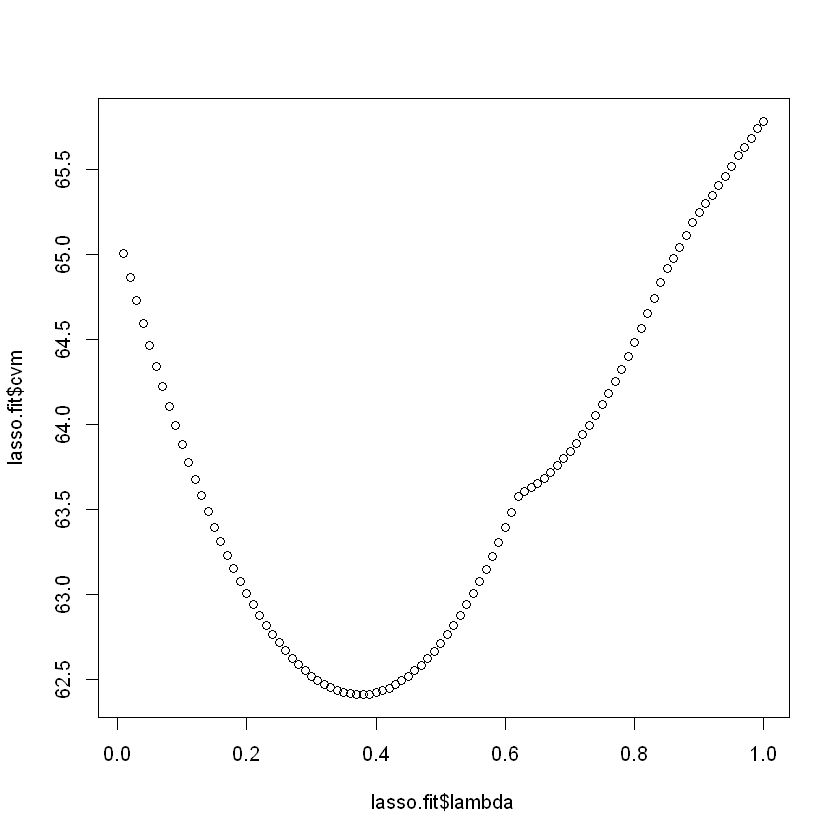

In [325]:
# training 𝑀𝑆𝐸 vs lambda
plot(lasso.fit$lambda, lasso.fit$cvm)

##### Coefficient

In [326]:
# coefficient
coef(lasso.fit, s = best.lambda)

6 x 1 sparse Matrix of class "dgCMatrix"
                          s1
(Intercept)      68.46070522
Agriculture      -0.10566736
Examination      -0.43906013
Education        -0.58656228
Catholic          0.06900618
Infant.Mortality  0.89219241

The coefficients for the lasso regression have smaller magnitude than that given by orignal regression. It performed both variable selection and shrinkage.

##### Out-of-sample test set performance

In [327]:
# out-of sample rmse
lasso.pred <- predict(lasso.fit, as.matrix(swissTest[,2:length(swissTest)]), s=best.lambda)
cal.rmse(c(lasso.pred), swissTest$Fertility)

[1] 7.425821